# Telco Customer Churn Prediction

## Algorithms
    Logistic Regression
    XGBoost
    Explainable Boosting Machine (EBM)
    Decision Tree
    Neural Network Models
    
 ## Survival Analysis
     Kaplan-Meier
     Cox's proportional hazard model


In [1]:
# toolboxes/libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(color_codes=True)

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score,  roc_curve
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC, LinearSVC
from sklearn.cluster import KMeans

!{sys.executable} -m pip install interpret
from interpret.glassbox import ExplainableBoostingClassifier, ClassificationTree

import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBClassifier

#from sklearn import model_selection

from sklearn.preprocessing import StandardScaler

# Handle imbalanced dataset in supervised learning
# https://www.datasciencecentral.com/profiles/blogs/handling-imbalanced-data-sets-in-supervised-learning-using-family
# conda install -c glemaitre imbalanced-learn
# for python[version='2.7.*|3.4.*|3.5.*|3.6.*']
!{sys.executable} -m pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE, ADASYN

import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\envs\\python36\\lib\\site-packages\\scikit_learn-0.23.2.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



  Using cached imbalanced_learn-0.8.1-py3-none-any.whl (189 kB)
  Using cached scikit_learn-0.24.2-cp36-cp36m-win_amd64.whl (6.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:


In [2]:
from platform import python_version
print('This Python version is: ', python_version())
import imblearn
print('Imbalanced learn version is: ',imblearn.__version__)


This Python version is:  3.6.13
Imbalanced learn version is:  0.7.0


In [3]:
# import data set
url = 'https://raw.githubusercontent.com/santamm/telecom-customer-churn-prediction/master/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# note:
# There're 11 rows that 'TotalCharge' are blanks, causing 'TotalCharge' datatype read as 'object' when importing

df = pd.read_csv(url, sep=',', na_values=[" "])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# change the data type to catgory

# df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# drop any na
df=df.dropna()
print('The dataset has', df.shape[0] , 'rows and', df.shape[1], 'columns.')

The dataset has 7032 rows and 21 columns.


In [6]:
df.sample(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
4171  9025-ZRPVR    Male              0      No         No       9   
1374  8999-YPYBV    Male              0     Yes        Yes      45   
3586  8722-NGNBH    Male              0      No         No       5   
3023  0238-WHBIQ    Male              0     Yes        Yes      72   
2622  5315-CKEQK    Male              1     Yes        Yes      28   
2291  7488-MXJIV  Female              0      No         No       4   
6545  1518-VOWAV  Female              0      No         No       9   
2885  7923-IYJWY    Male              1      No         No      67   
4028  5574-NXZIU    Male              0      No         No      63   
1482  9290-SHCMB  Female              1      No         No      13   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
4171          Yes                No              No  No internet service  ...   
1374          Yes                No             DSL                  Yes  ...   
3586           No  No phone service             DSL                  Yes  ...   
3023          Yes               Yes             DSL                  Yes  ...   
2622          Yes               Yes             DSL                   No  ...   
2291          Yes               Yes     Fiber optic                   No  ...   
6545          Yes                No             DSL                  Yes  ...   
2885          Yes               Yes     Fiber optic                  Yes  ...   
4028          Yes                No     Fiber optic                  Yes  ...   
1482          Yes                No     Fiber optic                   No  ...   

         DeviceProtection          TechSupport          StreamingTV  \
4171  No internet service  No internet service  No internet service   
1374                  Yes                  Yes                  Yes   
3586                  Yes                  Yes                   No   
3023                  Yes                  Yes                  Yes   
2622                   No                   No                   No   
2291                   No                   No                  Yes   
6545                   No                   No                  Yes   
2885                  Yes                  Yes                  Yes   
4028                  Yes                  Yes                  Yes   
1482                  Yes                   No                  Yes   

          StreamingMovies        Contract PaperlessBilling  \
4171  No internet service  Month-to-month              Yes   
1374                  Yes        Two year              Yes   
3586                   No  Month-to-month               No   
3023                  Yes        Two year               No   
2622                   No        One year              Yes   
2291                   No  Month-to-month              Yes   
6545                  Yes  Month-to-month              Yes   
2885                  Yes        Two year              Yes   
4028                  Yes        Two year               No   
1482                  Yes  Month-to-month              Yes   

                PaymentMethod MonthlyCharges  TotalCharges  Churn  
4171             Mailed check          18.95        185.60    Yes  
1374             Mailed check          84.35       3858.05     No  
3586             Mailed check          40.00        223.45    Yes  
3023  Credit card (automatic)          89.70       6339.30     No  
2622         Electronic check          51.00       1381.80     No  
2291         Electronic check          85.65        321.65    Yes  
6545         Electronic check          74.65        703.55    Yes  
2885  Credit card (automatic)         116.10       7839.85     No  
4028  Credit card (automatic)         109.20       7049.75     No  
1482         Electronic check          96.85       1235.55     No  

[10 rows x 21 columns]

## Data Preparation

In [7]:
# prepare the dataset
df2 = df.drop(columns=['customerID'])
target = df2['Churn'].map({'Yes': 1, 'No': 0})
features = df2.drop('Churn', axis=1)

In [8]:
# Defining the map function
def binary_map(feature):
    return feature.map({'Yes':1, 'No':0})

# Encoding gender category
features['gender'] = features['gender'].map({'Male':1, 'Female':0})

#Encoding other binary category
binary_list = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
features[binary_list] = features[binary_list].apply(binary_map)

In [9]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 


In [10]:
# split the dataset into numeric and objects to facilitate the analysis
numerics = ['float64', 'int64']
numeric_ds = features.select_dtypes(include=numerics)
objects_ds = features.select_dtypes(exclude=numerics)

In [11]:
## Examine correlations on  continuous features
numeric_ds[['tenure','MonthlyCharges','TotalCharges']].corr()

tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.246862      0.825880
MonthlyCharges  0.246862        1.000000      0.651065
TotalCharges    0.825880        0.651065      1.000000

#### total charges are highly correlated with both tenure and monthly charges

In [12]:
# remove TotalCharge
numeric_ds = numeric_ds.drop(['TotalCharges'], 1)

In [13]:
objects_ds.columns

Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaymentMethod'],
      dtype='object')

In [14]:
#Let's convert all the categorical variables into dummy variables
objects_dummies = pd.get_dummies(objects_ds)
objects_dummies.head()

MultipleLines_No  MultipleLines_No phone service  MultipleLines_Yes  \
0                 0                               1                  0   
1                 1                               0                  0   
2                 1                               0                  0   
3                 0                               1                  0   
4                 1                               0                  0   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    1                            0                   0   
1                    1                            0                   0   
2                    1                            0                   0   
3                    1                            0                   0   
4                    0                            1                   0   

   OnlineSecurity_No  OnlineSecurity_No internet service  OnlineSecurity_Yes  \
0                  1                                   0                   0   
1                  0                                   0                   1   
2                  0                                   0                   1   
3                  0                                   0                   1   
4                  1                                   0                   0   

   OnlineBackup_No  ...  StreamingMovies_No  \
0                0  ...                   1   
1                1  ...                   1   
2                0  ...                   1   
3                1  ...                   1   
4                1  ...                   1   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        1                  0                  0   
1                        0                  1                  0   
2                        1                  0                  0   
3                        0                  1                  0   
4                        1                  0                  0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 31 columns]

In [15]:
#standardize the numberic values

#normalized_df=(numeric_ds - numeric_ds.mean()) / numeric_ds.std()
#numeric_ds_2 = numeric_ds.drop(['tenure','MonthlyCharges'], 1)
#numeric_ds_2 = pd.concat([numeric_ds_2, normalized_df],axis=1)
#numeric_ds_2.head()

In [16]:
features_2 = pd.concat([numeric_ds,objects_dummies],axis=1)
features_2.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  MultipleLines_No  \
0                 1           29.85                 0   
1                 0           56.95                 1   
2                 1           53.85                 1   
3                 0           42.30                 0   
4                 1           70.70                 1   

   MultipleLines_No phone service  ...  StreamingMovies_No  \
0                               1  ...                   1   
1                               0  ...                   1   
2                               0  ...                   1   
3                               1  ...                   1   
4                               0  ...                   1   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        1                  0                  0   
1                        0                  1                  0   
2                        1                  0                  0   
3                        0                  1                  0   
4                        1                  0                  0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 39 columns]

In [17]:
data_df = pd.concat([df['Churn'],features_2],axis=1)
data_df.head()

Churn  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0    No       0              0        1           0       1             0   
1    No       1              0        0           0      34             1   
2   Yes       1              0        0           0       2             1   
3    No       1              0        0           0      45             0   
4   Yes       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  MultipleLines_No  ...  \
0                 1           29.85                 0  ...   
1                 0           56.95                 1  ...   
2                 1           53.85                 1  ...   
3                 0           42.30                 0  ...   
4                 1           70.70                 1  ...   

   StreamingMovies_No  StreamingMovies_No internet service  \
0                   1                                    0   
1                   1                                    0   
2                   1                                    0   
3                   1                                    0   
4                   1                                    0   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1                  0   
1                    0                        0                  1   
2                    0                        1                  0   
3                    0                        0                  1   
4                    0                        1                  0   

   Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
0                  0                                        0   
1                  0                                        0   
2                  0                                        0   
3                  0                                        1   
4                  0                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 40 columns]

### Let’s use the generalized linear model (GLM) to gain some statistics of the respective features with the target.

https://neptune.ai/blog/how-to-implement-customer-churn-prediction

In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Change variable name separators to '_'
all_columns = [column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_") for column in data_df.columns]

#Effect the change to the dataframe column names
data_df.columns = all_columns

#Prepare it for the GLM formula
glm_columns = [e for e in all_columns if e not in ['Churn']]
glm_columns = ' + '.join(map(str, glm_columns))

#Fiting it to the Generalized Linear Model
glm_model = smf.glm(formula=f'Churn ~ {glm_columns}', data=data_df, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

                      Generalized Linear Model Regression Results                      
Dep. Variable:     ['Churn[No]', 'Churn[Yes]']   No. Observations:                 7032
Model:                                     GLM   Df Residuals:                     7009
Model Family:                         Binomial   Df Model:                           22
Link Function:                           logit   Scale:                          1.0000
Method:                                   IRLS   Log-Likelihood:                -2924.5
Date:                         Sun, 10 Oct 2021   Deviance:                       5849.1
Time:                                 11:16:21   Pearson chi2:                 7.18e+03
No. Iterations:                              7                                         
Covariance Type:                     nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------

If the absolute p-value is smaller than 0.05, it means that the feature affects Churn in a statistically significant way. Examples are:

    SeniorCitizen
    Tenure
    Contract
    PaperlessBillings etc.



Feature importances can be answered by looking at the exponential coefficient values. The exponential coefficient estimates the expected change in churn through a given feature by a change of one unit.

Values more than 1 indicate increased churn. Values less than 1 indicate that churn is happening less.

https://neptune.ai/blog/how-to-implement-customer-churn-prediction

The second question about feature importances can be answered by looking at the exponential coefficient values. The exponential coefficient estimates the expected change in churn through a given feature by a change of one unit.

Values more than 1 indicate increased churn. Values less than 1 indicate that churn is happening less.

In [19]:
np.exp(res.params).sort_values(ascending=False)

InternetService_DSL                        1.965177
Contract_Two_year                          1.876652
OnlineBackup_No_internet_service           1.278508
StreamingTV_No_internet_service            1.278508
TechSupport_No_internet_service            1.278508
InternetService_No                         1.278508
StreamingMovies_No_internet_service        1.278508
DeviceProtection_No_internet_service       1.278508
OnlineSecurity_No_internet_service         1.278508
Dependents                                 1.178246
MultipleLines_No                           1.138602
StreamingMovies_No                         1.128017
StreamingTV_No                             1.121246
PaymentMethod_Credit_card__automatic_      1.119688
MultipleLines_No_phone_service             1.089190
tenure                                     1.034986
MonthlyCharges                             1.033080
PaymentMethod_Mailed_check                 1.030854
PaymentMethod_Bank_transfer__automatic_    1.025899
gender      

### Find positive and negative correlations

https://towardsdatascience.com/predict-customer-churn-in-python-e8cd6d3aaa7

In [20]:
correlations = features_2.corrwith(target)
correlations = correlations[correlations!=1]
positive_correlations = correlations[
correlations >0].sort_values(ascending = False)
negative_correlations =correlations[
correlations<0].sort_values(ascending = False)
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 Contract_Month-to-month           0.404565
OnlineSecurity_No                 0.342235
TechSupport_No                    0.336877
InternetService_Fiber optic       0.307463
PaymentMethod_Electronic check    0.301455
OnlineBackup_No                   0.267595
DeviceProtection_No               0.252056
MonthlyCharges                    0.192858
PaperlessBilling                  0.191454
SeniorCitizen                     0.150541
StreamingMovies_No                0.130920
StreamingTV_No                    0.128435
StreamingTV_Yes                   0.063254
StreamingMovies_Yes               0.060860
MultipleLines_Yes                 0.040033
PhoneService                      0.011691
dtype: float64

Most Negative Correlations: 
 gender                                    -0.008545
MultipleLines_No phone service            -0.011691
MultipleLines_No                          -0.032654
DeviceProtection_Yes                      -0.066193
OnlineBackup_Yes            

### Plot positive & negative correlations

Text(0.5, 1.0, 'Correlation with Churn Rate \n')

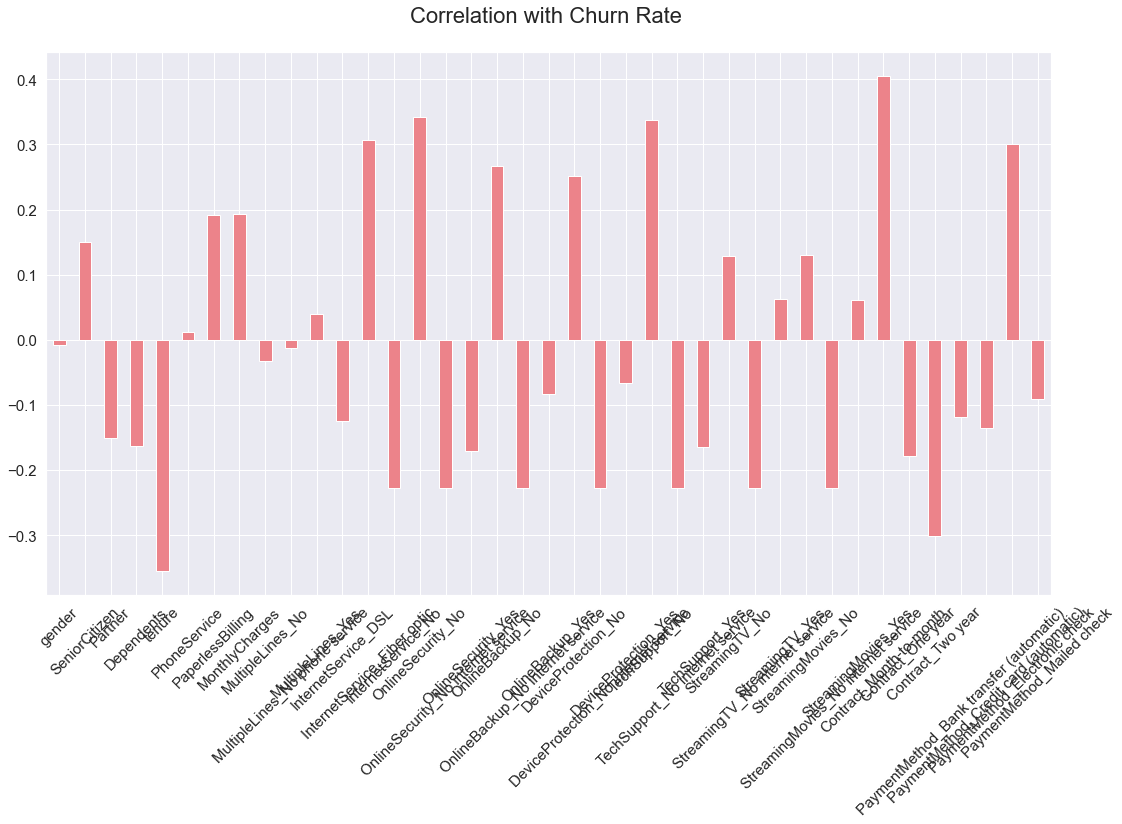

In [21]:
correlations = correlations[correlations!=1]

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

###  Check Multicollinearity using VIF
#### VIF determines the strength of the correlation of a variable with a group of other independent variables in a dataset. VIF starts usually at 1 and anywhere exceeding 10 indicates high multicollinearity between the independent variables.

https://towardsdatascience.com/predict-customer-churn-in-python-e8cd6d3aaa7

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])]
    return(vif)

calc_vif(features_2)

variables         VIF
0                                    gender    1.001917
1                             SeniorCitizen    1.153195
2                                   Partner    1.462792
3                                Dependents    1.380851
4                                    tenure    2.827621
5                              PhoneService         inf
6                          PaperlessBilling    1.208428
7                            MonthlyCharges  863.723924
8                          MultipleLines_No         inf
9            MultipleLines_No phone service         inf
10                        MultipleLines_Yes         inf
11                      InternetService_DSL         inf
12              InternetService_Fiber optic         inf
13                       InternetService_No         inf
14                        OnlineSecurity_No         inf
15       OnlineSecurity_No internet service         inf
16                       OnlineSecurity_Yes         inf
17                          OnlineBackup_No         inf
18         OnlineBackup_No internet service         inf
19                         OnlineBackup_Yes         inf
20                      DeviceProtection_No         inf
21     DeviceProtection_No internet service         inf
22                     DeviceProtection_Yes         inf
23                           TechSupport_No         inf
24          TechSupport_No internet service         inf
25                          TechSupport_Yes         inf
26                           StreamingTV_No         inf
27          StreamingTV_No internet service         inf
28                          StreamingTV_Yes         inf
29                       StreamingMovies_No         inf
30      StreamingMovies_No internet service         inf
31                      StreamingMovies_Yes         inf
32                  Contract_Month-to-month         inf
33                        Contract_One year         inf
34                        Contract_Two year         inf
35  PaymentMethod_Bank transfer (automatic)         inf
36    PaymentMethod_Credit card (automatic)         inf
37           PaymentMethod_Electronic check         inf
38               PaymentMethod_Mailed check         inf

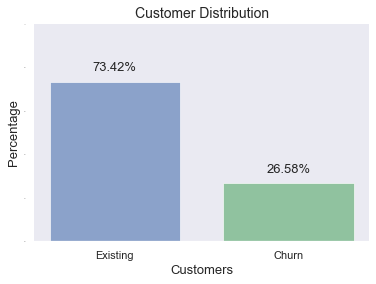

In [23]:
# https://github.com/ShivaliPatel/Data-science-projects/blob/master/Telco_customer_churn/Notebooks/Telecom%20Churn%20Prediction-v2.ipynb

def Generate_bar_graph(x, y, x_title, y_title, chart_title,color=['b','g','r','m','c', 'y']):
    """ Based on x and y value, generate bar graph """
   
    fig, ax = plt.subplots()
    ax.bar(range(len(x))
       , y
       , width = 0.75
       , color=color
        , alpha = 0.6) 

    # stopping alphabetical sorting of graph
    plt.xticks(range(len(x)),x)
    plt.title(chart_title, fontsize=14)
    plt.xlabel(x_title,fontsize=13)
    plt.ylabel(y_title,fontsize=13)
    plt.grid(b=False)
    plt.yticks(fontsize=0)
    plt.ylim(top=1)

    
    # Visible x - axis line
    for spine in plt.gca().spines.values():
        spine.set_visible(False) if spine.spine_type != 'bottom' else spine.set_visible(True)
    
    # Display label for each plot
    for i,v in (enumerate(y)):
        ax.text(i
                ,v+0.05
                ,str(round((v*100),2))+'%'
                ,fontsize=13
                ,ha='center')
    
    plt.show()


#----------------------------------------------------------------------
# Distribution in train dataset

Churn_rate = pd.value_counts(target) / len(target)
Generate_bar_graph(Churn_rate.index.map({0:'Existing',1:"Churn"})
                   , Churn_rate.values
                   , 'Customers'
                   , 'Percentage'
                   , 'Customer Distribution')

#### Since the churn rate is about much less than in the overall dataset, we will apply the class balancing technique to handle the imbalance.
#### We'll go with ADASYN over SMOTE as SMOTE will introduce some more noise into dataset comparing to ADASYN
#### For more details, refer to the article on https://www.datasciencecentral.com/profiles/blogs/handling-imbalanced-data-sets-in-supervised-learning-using-family

In [24]:
X = features_2
y = target

adasyn = ADASYN(random_state = 42)
X_adasyn, y_adasyn = adasyn.fit_sample(X, y)


print("----------------------------")
print("Original x train shape, ", X.shape)
print("Resample x train shape, ", X_adasyn.shape)
print("----------------------------")

from collections import Counter
print('Class Balance count : ',Counter(y_adasyn))

----------------------------
Original x train shape,  (7032, 39)
Resample x train shape,  (10275, 39)
----------------------------
Class Balance count :  Counter({0: 5163, 1: 5112})


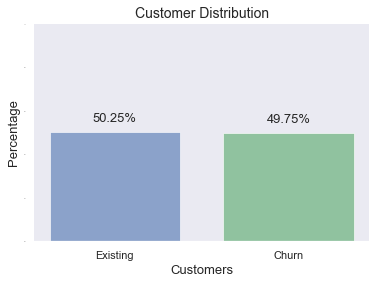

In [25]:
# After upsampling distribution in train dataset

Churn_rate = pd.value_counts(y_adasyn) / len( y_adasyn)
Generate_bar_graph(Churn_rate.index.map({0:'Existing',1:"Churn"})
                   , Churn_rate.values
                   , 'Customers'
                   , 'Percentage'
                   , 'Customer Distribution')

In [26]:
# Feature Scaling
# Standardize Data
# https://machinelearningmastery.com/prepare-data-machine-learning-python-scikit-learn/
# Standardize data (0 mean, 1 stdev)

sc_X = StandardScaler()
X_adasyn['MonthlyCharges'] = sc_X.fit_transform(X_adasyn[['MonthlyCharges']])
X_adasyn['tenure'] = sc_X.fit_transform(X_adasyn[['tenure']])

In [27]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, train_size=0.7, test_size=0.3, random_state=42) 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7192, 39) (7192,)
(3083, 39) (3083,)


##  Logistic Regression

In [28]:
## Instantiate classifier
logreg = LogisticRegression(random_state = 30)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=30)

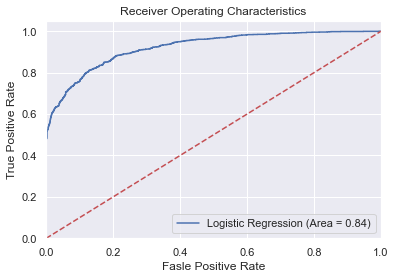

In [29]:
y_pred_logreg = logreg.predict(X_test)

logreg_roc_auc = roc_auc_score(y_test,y_pred_logreg)
fpr, tpr, thresholds = roc_curve(y_test,logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (Area = %0.2f)' % logreg_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

In [30]:
confusion_matrix_logreg = confusion_matrix(y_test,y_pred_logreg)
confusion_matrix_logreg

array([[1342,  222],
       [ 275, 1244]], dtype=int64)

In [31]:
# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_logreg).ravel()
print('\nTN = {0}, FP = {1}, FN = {2}, TP = {3}\n\n'.format(tn, fp, fn, tp))


TN = 1342, FP = 222, FN = 275, TP = 1244




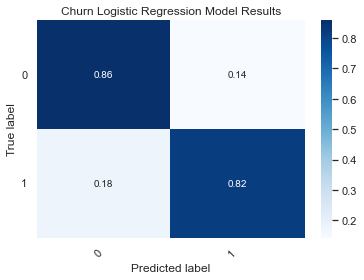

In [32]:
# https://builtin.com/machine-learning/model-explainability-python

def conf_mxt_heatmap (cm, y_train_ds):
    val = np.mat(cm) 
    classnames = list(set(y_train_ds))
    df_cm = pd.DataFrame(
            val, index=classnames, columns=classnames, 
        )
    df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]  

    plt.figure()
    heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Churn Logistic Regression Model Results')
    plt.show()


conf_mxt_heatmap (confusion_matrix_logreg, y_train)

In [33]:
classify_logreg = classification_report(y_test, y_pred_logreg)
print(classify_logreg)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1564
           1       0.85      0.82      0.83      1519

    accuracy                           0.84      3083
   macro avg       0.84      0.84      0.84      3083
weighted avg       0.84      0.84      0.84      3083



In [34]:
# https://github.com/jsaikmr/Telecom-Churn-Prediction/blob/master/Telecom_Churn_Prediction-Final_Solution.ipynb
from sklearn.metrics import f1_score

def evaluate_model(actual, pred):
    # Accuracy Score
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC score : ',roc_score)
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    print('Precision score : ', prec_score)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    print('Recall score : ', rec_score)
    # f1 score
    f1 = round(f1_score(actual, pred)*100,2)
    print('f1 score : ', f1)
    return acc_score, roc_score, prec_score, rec_score, f1

In [35]:
# Model evaluation
acc_score, roc_score, prec_score, rec_score, f1 = evaluate_model(y_test, y_pred_logreg)

Accuracy Score :  83.88
ROC AUC score :  83.85
Precision score :  84.86
Recall score :  81.9
f1 score :  83.35


AxesSubplot(0.125,0.125;0.775x0.755)


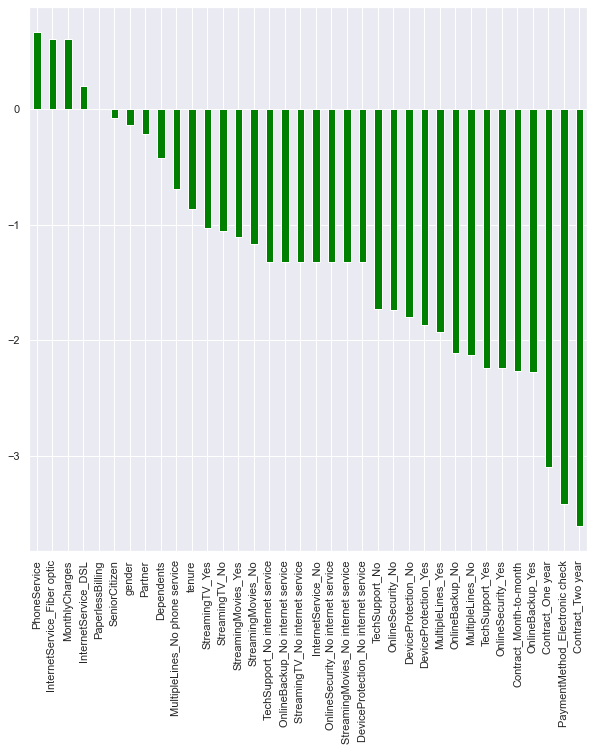

In [36]:
# https://github.com/Nickssingh/Churn-Prediction-Model-Telecommunication/blob/master/Telecommunication%20Churn%20Nick.ipynb
# Weights of the variables
plt.rcParams['figure.figsize'] = (10, 10)
logweights = pd.Series(logreg.coef_[0], index=X.columns.values)
weight_logreg = logweights.sort_values(ascending = False)[:36].plot(kind='bar', color='green')
print (weight_logreg)

In [37]:
# https://github.com/srees1988/predict-churn-py/blob/main/Predict%20Customer%20Churn.ipynb
# Analyzing Coefficients
feature_importances = pd.concat([pd.DataFrame( X.columns.values,columns = ["features"]),
           pd.DataFrame(np.transpose(logreg.coef_), columns = ["coef"])],axis = 1)

feature_importances.sort_values("coef", ascending = False)

features      coef
5                              PhoneService  0.667842
12              InternetService_Fiber optic  0.609328
7                            MonthlyCharges  0.603980
11                      InternetService_DSL  0.197910
6                          PaperlessBilling -0.003540
1                             SeniorCitizen -0.077477
0                                    gender -0.135777
2                                   Partner -0.217568
3                                Dependents -0.419668
9            MultipleLines_No phone service -0.691099
4                                    tenure -0.861427
28                          StreamingTV_Yes -1.030739
26                           StreamingTV_No -1.051897
31                      StreamingMovies_Yes -1.105117
29                       StreamingMovies_No -1.171331
15       OnlineSecurity_No internet service -1.325738
30      StreamingMovies_No internet service -1.325738
18         OnlineBackup_No internet service -1.325738
13                       InternetService_No -1.325738
27          StreamingTV_No internet service -1.325738
21     DeviceProtection_No internet service -1.325738
24          TechSupport_No internet service -1.325738
23                           TechSupport_No -1.726621
14                        OnlineSecurity_No -1.739869
20                      DeviceProtection_No -1.804324
22                     DeviceProtection_Yes -1.871155
10                        MultipleLines_Yes -1.928016
17                          OnlineBackup_No -2.108337
8                          MultipleLines_No -2.132423
25                          TechSupport_Yes -2.240772
16                       OnlineSecurity_Yes -2.244763
32                  Contract_Month-to-month -2.264383
19                         OnlineBackup_Yes -2.280522
33                        Contract_One year -3.095296
37           PaymentMethod_Electronic check -3.421865
34                        Contract_Two year -3.610147
38               PaymentMethod_Mailed check -3.699032
35  PaymentMethod_Bank transfer (automatic) -3.889899
36    PaymentMethod_Credit card (automatic) -4.068715

To do feature selection to enable the machine learning algorithm to train faster, reduce model complexity, increase interpretability, and improve model accuracy if the right features subset is chosen.

In [38]:
# Feature selection to improve model building
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
log = LogisticRegression()
rfecv = RFECV(estimator=log, cv=StratifiedKFold(10, random_state=50, shuffle=True), scoring="accuracy")
rfecv.fit(X_adasyn, y_adasyn)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
      estimator=LogisticRegression(), scoring='accuracy')

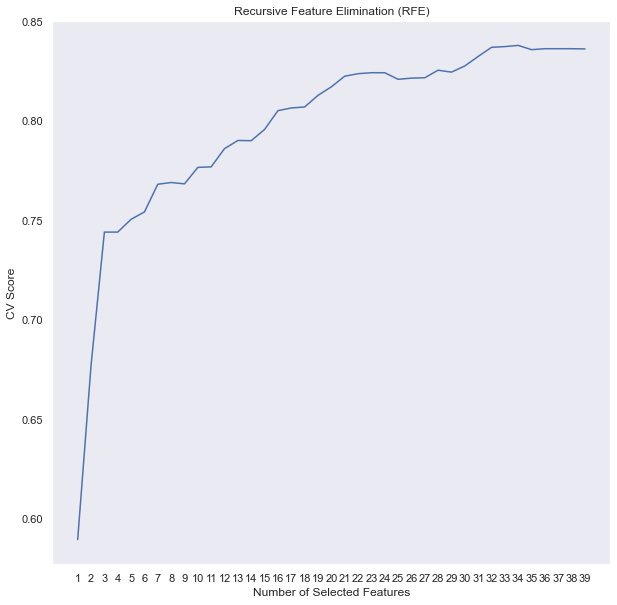

The optimal number of features: 34


In [39]:
plt.figure(figsize=(10, 10))
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, X_adasyn.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

In [40]:
#Saving dataframe with optimal features
X_rfe = X_adasyn.iloc[:, rfecv.support_]

#Overview of the optimal features in comparison with the intial dataframe
print("\"X\" dimension: {}".format(X_adasyn.shape))
print("\"X\" column list:", X_adasyn.columns.tolist())
print("\"X_rfe\" dimension: {}".format(X_rfe.shape))
print("\"X_rfe\" column list:", X_rfe.columns.tolist())

"X" dimension: (10275, 39)
"X" column list: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [41]:
## Set up hyperparameter grid for tuning
lr_param_grid = {'C' : [0.0001, 0.001, 0.01, 0.05, 0.1] }

## Tune hyperparamters
lr_cv = GridSearchCV(logreg, param_grid = lr_param_grid, cv = 5)

## Fit lr to training data
lr_cv.fit(X_train, y_train)

## Get info about best hyperparameters
print("Tuned LR Parameters: {}".format(lr_cv.best_params_))
print("Best LR Training Score:{}".format(lr_cv.best_score_)) 

## Predict lr on test data
print("LR Test Performance: {}".format(lr_cv.score(X_test, y_test)))

## Obtain model performance metrics
lr_pred_prob = lr_cv.predict_proba(X_test)[:,1]
lr_auroc = roc_auc_score(y_test, lr_pred_prob)
print("LR AUROC: {}".format(lr_auroc))
lr_y_pred = lr_cv.predict(X_test)


Tuned LR Parameters: {'C': 0.1}
Best LR Training Score:0.8263324186843553
LR Test Performance: 0.8313331170937399
LR AUROC: 0.9180337632949394


#### The area under the receiver operating characteristics curve (AUROC) for the LR classifier is 0.9

## Binary Classification Model with XGBoost

In [42]:
#building the model & printing the score
xgb_model = XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)


[11:16:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


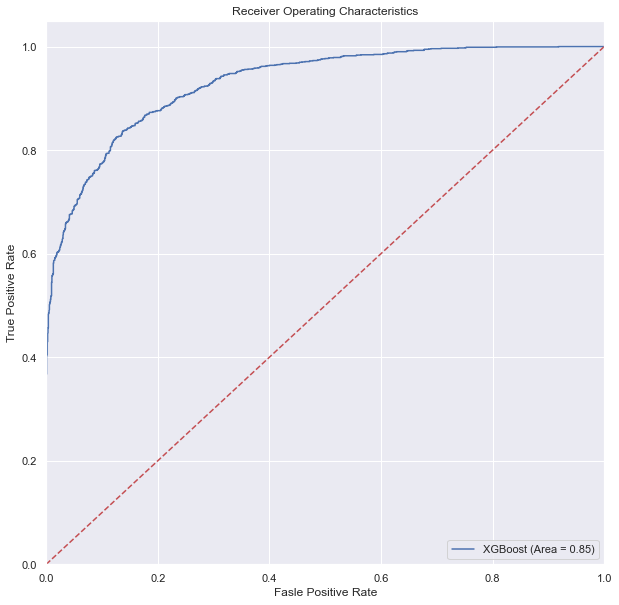

In [43]:
y_pred_xgb_model = xgb_model.predict(X_test)

xgb_model_roc_auc = roc_auc_score(y_test,y_pred_xgb_model)
fpr, tpr, thresholds = roc_curve(y_test,xgb_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (Area = %0.2f)' % xgb_model_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

In [44]:
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb_model)
confusion_matrix_xgb

array([[1314,  250],
       [ 225, 1294]], dtype=int64)

In [45]:
# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_xgb_model).ravel()
print('\nTN = {0}, FP = {1}, FN = {2}, TP = {3}\n\n'.format(tn, fp, fn, tp))


TN = 1314, FP = 250, FN = 225, TP = 1294




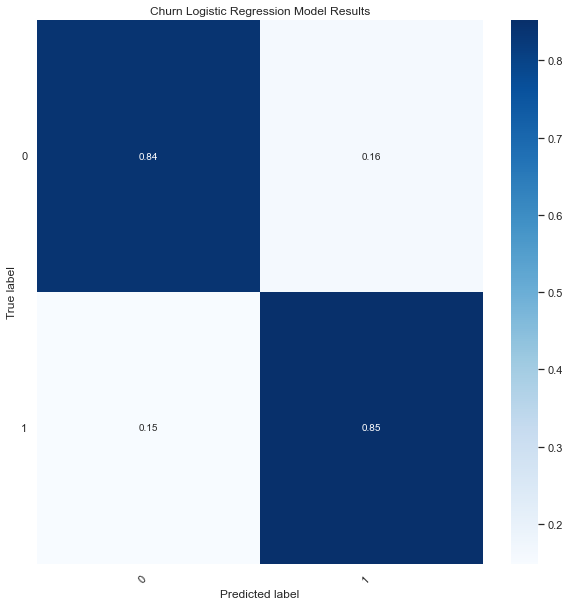

In [46]:
conf_mxt_heatmap (confusion_matrix_xgb, y_train)

In [47]:
classify_xgb_model = classification_report(y_test, y_pred_xgb_model)
print(classify_xgb_model)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1564
           1       0.84      0.85      0.84      1519

    accuracy                           0.85      3083
   macro avg       0.85      0.85      0.85      3083
weighted avg       0.85      0.85      0.85      3083



In [48]:
# Model evaluation
acc_score, roc_score, prec_score, rec_score, f1 = evaluate_model(y_test, y_pred_xgb_model)

Accuracy Score :  84.59
ROC AUC score :  84.6
Precision score :  83.81
Recall score :  85.19
f1 score :  84.49


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

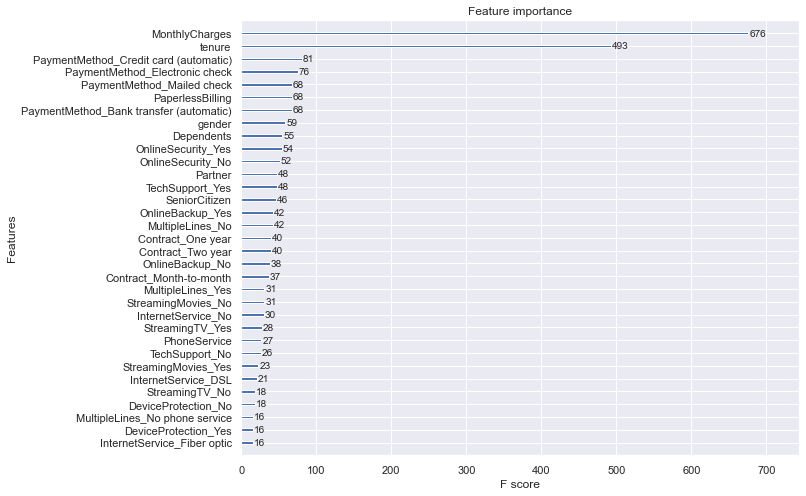

In [49]:
# The XGBoost library provides a built-in function to plot features ordered by their importance.

from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

### Feature Selection with XGBoost Feature Importance Scores

The performance measure may be the purity (Gini index) used to select the split points or another more specific error function.

The feature importances are then averaged across all of the the decision trees within the model.

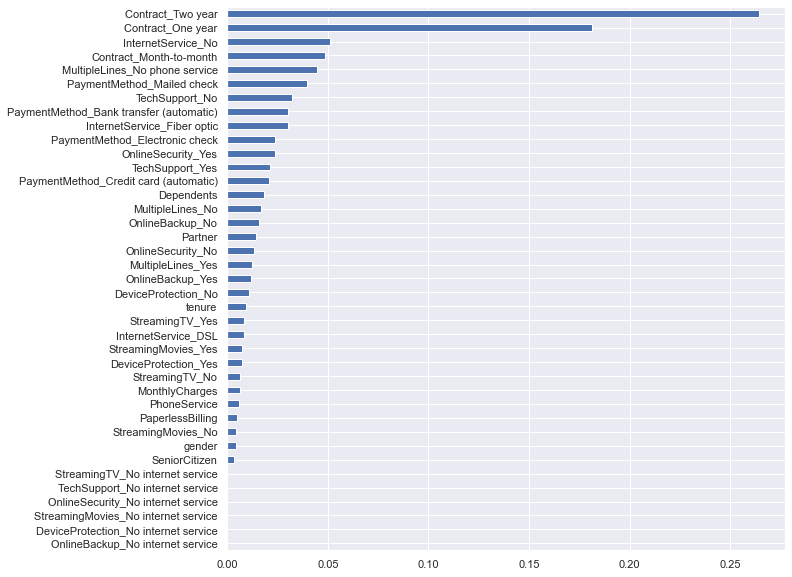

In [50]:
important_features = pd.Series(data=xgb_model.feature_importances_,index=X.columns)
important_features.sort_values(ascending=True,inplace=True)
fig, ax = plt.subplots(figsize=(10,10))
important_features.plot(kind='barh', ax=ax)
plt.show()

## Explainable Boosting Machine (EBM)

https://towardsdatascience.com/are-you-answering-the-right-churn-questions-ed146c34b336

https://coderzcolumn.com/tutorials/machine-learning/interpret-ml-explain-machine-learning-models-and-their-predictions

https://interpret.ml/docs/ebm.html

In [51]:
seed =100
ebm = ExplainableBoostingClassifier(random_state=seed,interactions=100, n_jobs =3)
ebm.fit(X_train,y_train)

ExplainableBoostingClassifier(feature_names=['gender', 'SeniorCitizen',
                                             'Partner', 'Dependents', 'tenure',
                                             'PhoneService', 'PaperlessBilling',
                                             'MonthlyCharges',
                                             'MultipleLines_No',
                                             'MultipleLines_No phone service',
                                             'MultipleLines_Yes',
                                             'InternetService_DSL',
                                             'InternetService_Fiber optic',
                                             'InternetService_No',
                                             'OnlineSecurity_No',
                                             'OnlineSecurity_No internet '
                                             'service...
                                             'categorical', 'categorical',
          

In [52]:
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())

from interpret import show

ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

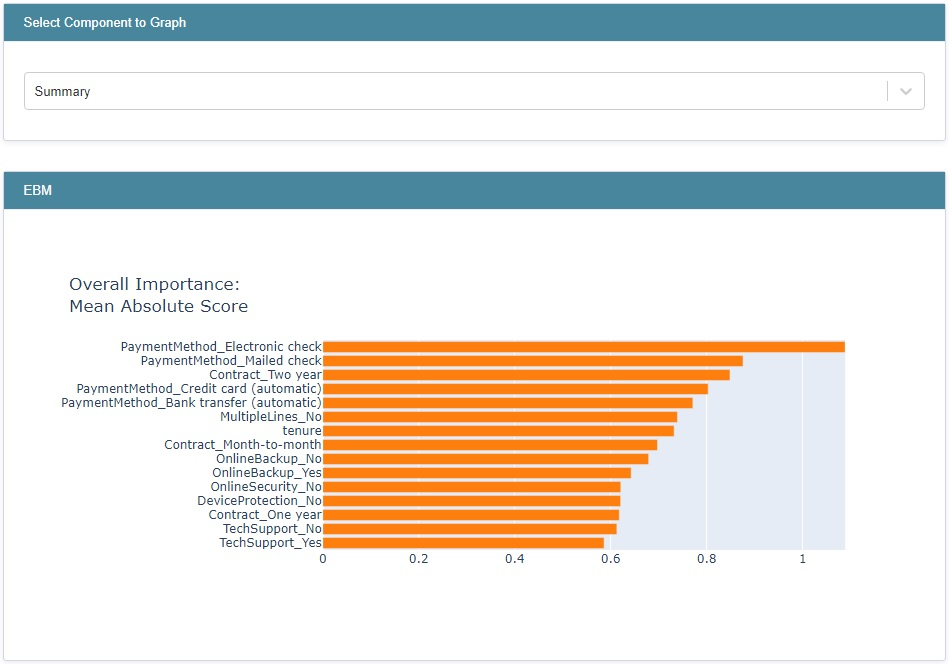

In [88]:
# github can't display above graph
from IPython.display import Image
Image(filename='../Unknown/test_folder/ebm_1.jpg') 

In [53]:
#ebm_local = ebm.explain_local(X_test[:5], y_test[:5], name='EBM')
#show(ebm_local)

In [54]:
#  check the performance metrics
from interpret.perf import ROC
ebm_perf = ROC(ebm.predict_proba).explain_perf(X_test, y_test, name='EBM')
show(ebm_perf)

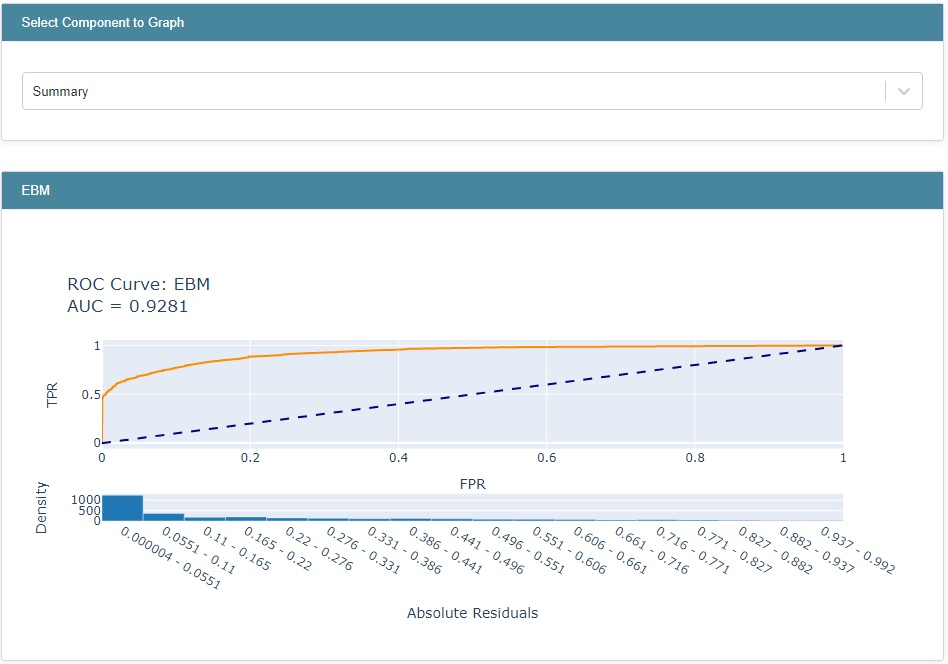

In [91]:
# github can't display above graph
from IPython.display import Image
Image(filename='../Unknown/test_folder/ebm_2.jpg') 

In [55]:
y_pred_ebm = ebm.predict(X_test)

confusion_matrix_ebm = confusion_matrix(y_test, y_pred_ebm)
confusion_matrix_ebm

array([[1328,  236],
       [ 246, 1273]], dtype=int64)

In [56]:
# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_ebm).ravel()
print('\nTN = {0}, FP = {1}, FN = {2}, TP = {3}\n\n'.format(tn, fp, fn, tp))


TN = 1328, FP = 236, FN = 246, TP = 1273




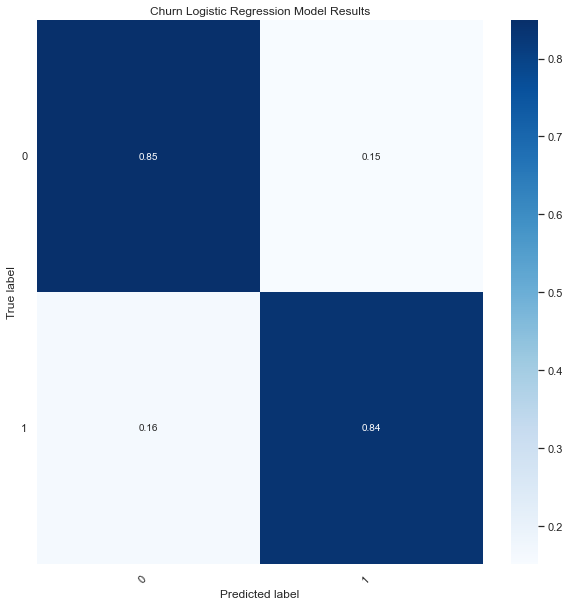

In [57]:
conf_mxt_heatmap (confusion_matrix_ebm, y_train)

In [58]:
classify_ebm_model = classification_report(y_test, y_pred_ebm)
print(classify_ebm_model)

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1564
           1       0.84      0.84      0.84      1519

    accuracy                           0.84      3083
   macro avg       0.84      0.84      0.84      3083
weighted avg       0.84      0.84      0.84      3083



In [59]:
# Model evaluation
acc_score, roc_score, prec_score, rec_score, f1 = evaluate_model(y_test, y_pred_ebm)


Accuracy Score :  84.37
ROC AUC score :  84.36
Precision score :  84.36
Recall score :  83.81
f1 score :  84.08


## Decision Tree

In [86]:
seed =100
dtree = ClassificationTree(random_state=seed)
dtree.fit(X_train,y_train)

dt_global = dtree.explain_global(name='Decision Tree')
show(dt_global)

#dt_local = dtree.explain_local(X_test[:5], y_test[:5])
#show(dt_local)

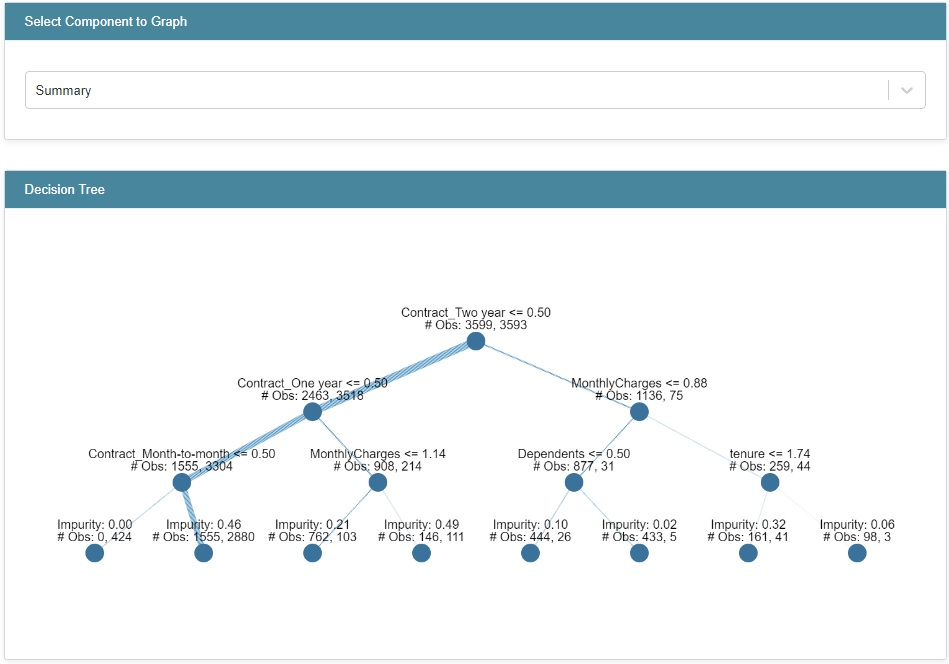

In [90]:
# github can't display above graph
from IPython.display import Image
Image(filename='../Unknown/test_folder/dtree_1.jpg') 

In [87]:
dtree_perf = ROC(dtree.predict_proba).explain_perf(X_test, y_test, name='Decision Tree')
show(dtree_perf)

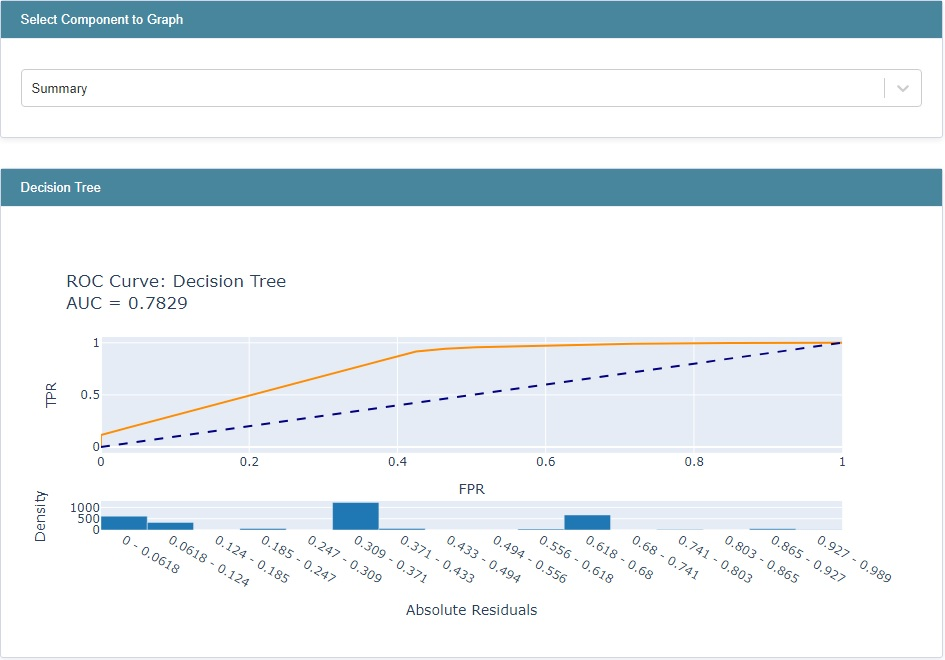

In [89]:
# github can't display above graph
from IPython.display import Image
Image(filename='../Unknown/test_folder/dtree_2.jpg') 

In [69]:
y_pred_dtree = dtree.predict(X_test)

confusion_matrix_dtree = confusion_matrix(y_test, y_pred_dtree)
confusion_matrix_dtree

array([[ 899,  665],
       [ 127, 1392]], dtype=int64)

In [70]:
# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_dtree).ravel()
print('\nTN = {0}, FP = {1}, FN = {2}, TP = {3}\n\n'.format(tn, fp, fn, tp))


TN = 899, FP = 665, FN = 127, TP = 1392




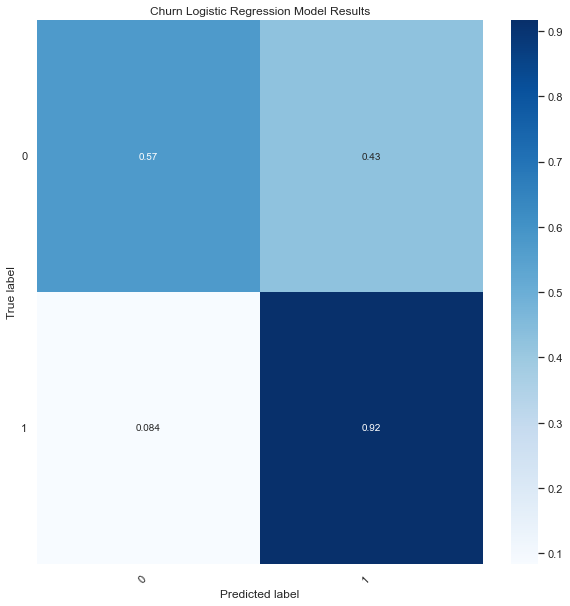

In [71]:
conf_mxt_heatmap (confusion_matrix_dtree, y_train)

In [72]:
classify_dtree = classification_report(y_test, y_pred_dtree)
print(classify_dtree)

              precision    recall  f1-score   support

           0       0.88      0.57      0.69      1564
           1       0.68      0.92      0.78      1519

    accuracy                           0.74      3083
   macro avg       0.78      0.75      0.74      3083
weighted avg       0.78      0.74      0.74      3083



In [73]:
# Model evaluation
acc_score, roc_score, prec_score, rec_score, f1 = evaluate_model(y_test, y_pred_dtree)

Accuracy Score :  74.31
ROC AUC score :  74.56
Precision score :  67.67
Recall score :  91.64
f1 score :  77.85


## Neural Network Models

In [74]:
!{sys.executable} -m pip install keras 
!{sys.executable} -m pip install tensorflow==1.13.2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from keras.models import Sequential  
#from keras.layers import Dense, ReLU, Dropout

In [75]:
# initialize the sequential method
nn_model = Sequential()

# add two layers with eight nodes to our model object
nn_model.add(Dense(8, input_dim = 39))
nn_model.add(Dense(8, activation='relu'))

# add our output layer with one node and compile our model
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.compile(optimizer='adam', loss='binary_crossentropy', 
metrics=['accuracy'])

nn_model.fit(X_train, y_train, epochs = 1)

y_pred_nn = [round(float(x)) for x in nn_model.predict(X_test)]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
7192/7192 [==============================] - 1s 81us/sample - loss: 0.6008 - acc: 0.6823


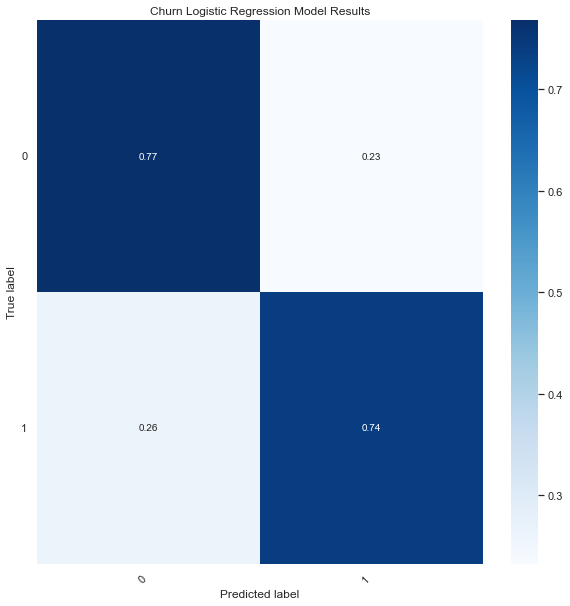

In [76]:
confusion_matrix_nn = confusion_matrix(y_test, y_pred_nn)

conf_mxt_heatmap (confusion_matrix_nn, y_train)

In [77]:
# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_nn).ravel()
print('\nTN = {0}, FP = {1}, FN = {2}, TP = {3}\n\n'.format(tn, fp, fn, tp))



TN = 1201, FP = 363, FN = 398, TP = 1121




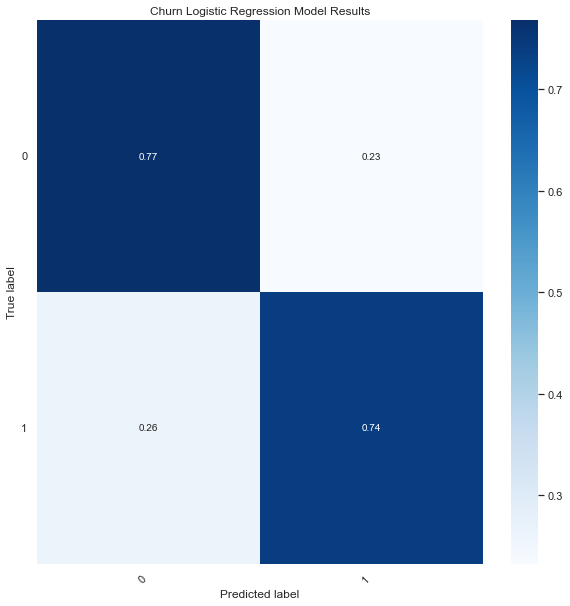

In [78]:
conf_mxt_heatmap (confusion_matrix_nn, y_train)

In [79]:
classify_nn = classification_report(y_test, y_pred_nn)
print(classify_nn)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1564
           1       0.76      0.74      0.75      1519

    accuracy                           0.75      3083
   macro avg       0.75      0.75      0.75      3083
weighted avg       0.75      0.75      0.75      3083



In [80]:
# Model evaluation
acc_score, roc_score, prec_score, rec_score, f1 = evaluate_model(y_test, y_pred_nn)


Accuracy Score :  75.32
ROC AUC score :  75.29
Precision score :  75.54
Recall score :  73.8
f1 score :  74.66


### Use SHAP to explain the Explainable Boosting Machine

Permutation explainer: 1001it [03:33,  4.57it/s]                          


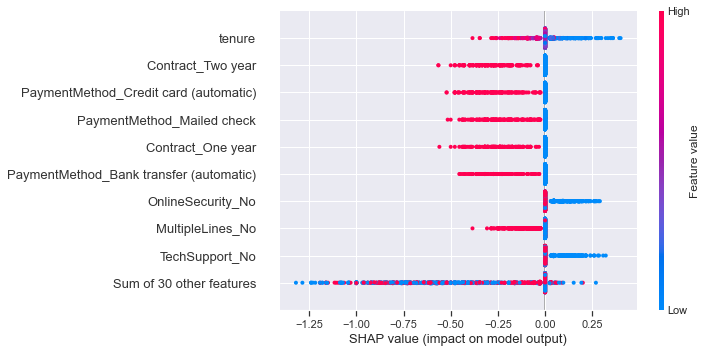

In [81]:
!{sys.executable} -m pip install shap
import shap

f = lambda x: ebm.predict(x)
med = X_train.median().values.reshape((1,X_train.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(X_test.iloc[0:1000,:])

shap.plots.beeswarm(shap_values)

As we saw from the Explainable Boosting Machine, tenure, Contract, and PaymentMethod  are the three dominant features that explain the outcome

### Use LIME to explain Explainable Boosting Machine

#### https://builtin.com/machine-learning/model-explainability-python

LIME is typically faster to compute than SHAP, so if results need to be generated quickly, LIME is the better option. In practice, though, SHAP will be more accurate with feature explanation than LIME because it is more mathematically rigorous. For this reason, SHAP is more computationally intensive and is a good option if you have sufficient time and computational resources. 

In [82]:
!{sys.executable} -m pip install lime
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(X_train),
            feature_names = X_train.columns,class_names=['Yes', 'No'],
            mode='classification')

exp = explainer.explain_instance(data_row=X_test.iloc[1], predict_fn=ebm.predict_proba, labels=(0,))

exp.show_in_notebook(show_table=True)

#### If time is limited LIME is the better, although less accurate, option. If you have sufficient time and resources, SHAP is the better choice. 

## Survival Analysis
#### the survival rate for the average customer using a Kaplan-Meier survival curve.

Using the code below, we can fit a KM survival curve to the customer churn data, and plot our survival curve with a confidence interval.

The survival curve is cumulative. Meaning, in the graph below, after 20 months, the chance of a customer not canceling service is just above 80%. Even after 72 months, the company is able to retain 60% or more of their customers.

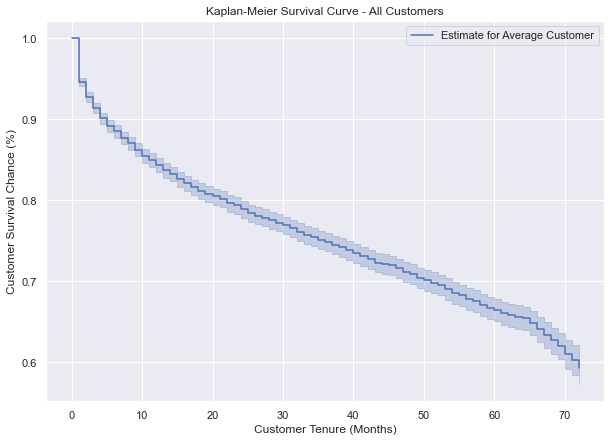

In [83]:
# https://github.com/zangell44/survival-analysis-lifeline-basics/blob/master/customer_churn.ipynb

!{sys.executable} -m pip install lifelines
import lifelines

# fitting kmf to churn data
t = X['tenure']
churn = y.values
kmf = lifelines.KaplanMeierFitter()
kmf.fit(t, event_observed=churn, label='Estimate for Average Customer')

# plotting kmf curve
fig, ax = plt.subplots(figsize=(10,7))
kmf.plot(ax=ax)
ax.set_title('Kaplan-Meier Survival Curve - All Customers')
ax.set_xlabel('Customer Tenure (Months)')
ax.set_ylabel('Customer Survival Chance (%)')
plt.show()


### Kaplan Meier

https://ichi-pro.translate.goog/pt/voce-esta-respondendo-as-perguntas-de-rotatividade-certas-260671970521910?_x_tr_sl=pt&_x_tr_tl=en&_x_tr_hl=en&_x_tr_pto=nui,sc

Kaplan Meier is a non-parametric statistic used to estimate the survival function. It is usually represented by the Kaplan Meier curve that shows the probability of an event in the respective time intervals.

The Kaplan Meier model uses two inputs, the time variable T and a variable called E, which is a binary flag that represents the event that has or has not occurred. Translating this to our problem, we can use the possession variable as our T and the binary variable Churn as our E event.

### Cox's proportional hazard model

The idea behind Cox's proportional hazard model is that an individual's logarithmic risk is a linear function of its static covariates and a population-level baseline risk that changes over time.

In [84]:
# https://github.com/zangell44/survival-analysis-lifeline-basics/blob/master/customer_churn.ipynb
# To examine the effects of different features, we will use the Cox Proportional Hazards Model

data_df2 = data_df.copy()
data_df2['Churn'] = data_df2['Churn'].map({'Yes': 1, 'No': 0})


cph = lifelines.CoxPHFitter(penalizer=0.0001)
cph.fit(data_df2, duration_col='tenure', event_col='Churn', robust=True) #, show_progress=False)
cph.print_summary(model="telecom churn prediction variables", decimals=3)    ## Have a look at the significance of the features)

# https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-modelMatrix

<lifelines.CoxPHFitter: fitted with 7032 total observations, 5163 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
                penalizer = 0.0001
                 l1 ratio = 0.0
          robust variance = True
      baseline estimation = breslow
   number of observations = 7032
number of events observed = 1869
   partial log-likelihood = -13885.119
         time fit was run = 2021-10-10 18:47:22 UTC
                    model = telecom churn prediction variables

---
                                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                       
gender                                  -0.085      0.918      0.049           -0.181            0.010                0.835                1.010
SeniorCitizen                           -0.071      0.931      0.060           -0.189            0.047                0.827                1.048
Partner                                 -0.518      0.596      0.057           -0.630           -0.406                0.533                0.667
Dependents                              -0.054      0.947      0.069           -0.190            0.082                0.827                1.085
PhoneService                            -0.001      0.999      0.179           -0.352            0.351                0.703                1.420
PaperlessBilling                         0.181      1.199      0.060            0.064            0.299                1.066                1.348
MonthlyCharges                          -0.006      0.994      0.017           -0.038            0.027                0.962                1.027
MultipleLines_No                         0.212      1.236      0.031            0.152            0.272                1.164                1.313
MultipleLines_No_phone_service           0.001      1.001      0.179           -0.351            0.352                0.704                1.422
MultipleLines_Yes                       -0.217      0.805      0.078           -0.371           -0.063                0.690                0.939
InternetService_DSL                     -0.255      0.775      0.184           -0.615            0.105                0.541                1.111
InternetService_Fiber_optic              0.277      1.319      0.235           -0.185            0.738                0.831                2.092
InternetService_No                      -0.063      0.939      0.100           -0.260            0.133                0.771                1.143
OnlineSecurity_No                        0.304      1.355      0.031            0.244            0.364                1.277                1.439
OnlineSecurity_No_internet_service      -0.063      0.939      0.100           -0.260            0.133                0.771                1.143
OnlineSecurity_Yes                      -0.319      0.727      0.092           -0.500           -0.139                0.607                0.870
OnlineBackup_No                          0.321      1.379      0.028            0.267            0.375                1.306                1.456
OnlineBackup_No_internet_service        -0.063      0.939      0.100           -0.260            0.133                0.771                1.143
OnlineBackup_Yes                        -0.303      0.739      0.085           -0.468           -0.137                0.626                0.872
DeviceProtection_No                      0.163      1.177      0.028            0.109            0.217                1.115                1.243
DeviceProtection_No_internet_service    -0.063      0.939      0.100           -0.260            0.133                0.771                1.143
DeviceProtection_Yes                    -0.131      0.878      0.084           -0.295            0.034                0.744             

#### https://github.com/zangell44/survival-analysis-lifeline-basics/blob/master/customer_churn.ipynb


In the above regression, the key output is exp(coef). This is interpreted as the scaling of hazard risk for each additional unit of the variable, 1.00 being neutral.

For example, the last exp(coefficient), corresponding to PaymentMethod_Mailed check, means a customer that pays by mailing a check is 1.68 times as likely to cancel their service.

For the company, exp(coef) below 1.0 is good, meaning a customer less likely to cancel.

To better visualize the above, we can plot the coefficient outputs and their confidence intervals.


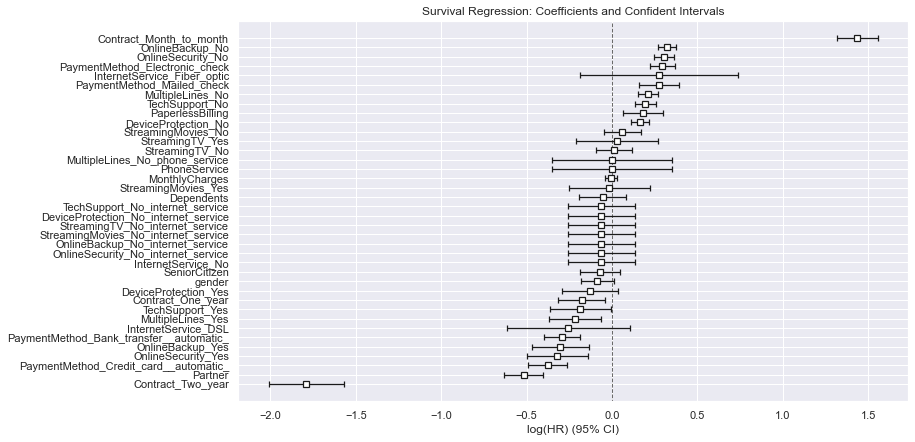

In [85]:
# plotting coefficients
fig_coef, ax_coef = plt.subplots(figsize=(12,7))
ax_coef.set_title('Survival Regression: Coefficients and Confident Intervals')
cph.plot(ax=ax_coef);